# Walmart Trip Type Classification
### Capstone Project - 1
### By: * Rajesh Dharmarajan *
******************
_This is my first capstone project for Springboard Career Track. This is a classification problem with Data from Walmart to predict the Trip Type. This is orginally from a Kaggle competition_

** Overview **


Walmart uses both art and science to continually make progress on their core mission of better understanding and serving their customers. One way Walmart is able to improve customers' shopping experiences is by segmenting their store visits into different trip types. 

Whether they're on a last minute run for new puppy supplies or leisurely making their way through a weekly grocery list, classifying trip types enables Walmart to create the best shopping experience for every customer.

Currently, Walmart's trip types are created from a combination of existing customer insights ("art") and purchase history data ("science"). 

The challenge here is to classify customer trips using only a transactional dataset of the items they've purchased.

https://www.kaggle.com/c/walmart-recruiting-trip-type-classification


In [1]:
import pandas as pd
import tkinter
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
#matplotlib inline
#%matplotlib notebook
import seaborn as sns
pd.set_option('display.max_columns', None)

** Read the file **

In [2]:
df_walmart_raw = pd.read_csv('wm_train.csv')

**Data fields**

* TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
* VisitNumber - an id corresponding to a single trip by a single customer
* Weekday - the weekday of the trip
* Upc - the UPC number of the product purchased
* ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
* DepartmentDescription - a high-level description of the item's department
* FinelineNumber - a more refined category for each of the products, created by Walmart

In [4]:
df_walmart_raw.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [5]:
df_walmart_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB




Lets look at the data
****

In [6]:
unique_trips = len(df_walmart_raw.VisitNumber.unique())# number of unique trips - 95,674

In [7]:
unique_UPC = len(df_walmart_raw.Upc.unique())# number of unique UPC - 97,715

In [8]:
unique_FilelineNumber = len(df_walmart_raw.FinelineNumber.unique()) # number of unique FinelineNumber - 5,196

In [9]:
unique_TripTypes = len(df_walmart_raw.TripType.unique())#38 different types of Trips

In [10]:
unique_departments = len(df_walmart_raw.DepartmentDescription.unique())#69 different types of departments

In [564]:
# Check if there are any rows where UPC is present, but Department Description is not present
df_walmart_raw[((df_walmart_raw.DepartmentDescription.isnull()) & (df_walmart_raw.Upc.notnull()))]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


In [565]:
# Check if there are any rows where UPC is present, but Fineline Number is not present
df_walmart_raw[((df_walmart_raw.FinelineNumber.isnull()) & (df_walmart_raw.Upc.notnull()))]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


In [554]:
#let us look at rows that have null UPC
df_null_upc=df_walmart_raw[(df_walmart_raw.Upc.isnull())]

In [555]:
len(df_null_upc)#a total of 4,129 rows have null UPC

4129

In [556]:
#let us look at a few rows
df_null_upc.head(10)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN
1134,999,484,Friday,NaN,-2,NaN,NaN
1135,999,484,Friday,NaN,-2,NaN,NaN
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN


From the above, we see that the `FinelineNumber` is also $null$ when the `UPC` is null. There are some rows where `DepartmentDescription` is present and all of the null UPC rows have a valid `ScanCount` . Let us check if there are any other departments other than Pharmacy in these null UPC data.

In [557]:
df_null_upc[((df_null_upc.DepartmentDescription.notnull()) & 
             (df_null_upc.DepartmentDescription != 'PHARMACY RX'))]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


***
Check if these data with null UPC numbers have a valid Fineline Number

In [559]:
df_null_upc[(df_null_upc.FinelineNumber.notnull()) ]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


In [316]:
#let us look at the distribution of the TripTypes when UPC is null
df_null_upc.TripType.value_counts()

5      2583
999     352
40      193
39      135
25      116
9        82
8        78
37       68
44       63
42       50
36       49
24       48
38       40
43       38
32       31
7        31
15       21
41       18
33       16
30       15
27       13
34       12
22       11
35        9
21        7
20        7
18        6
28        6
3         5
4         5
29        5
31        4
26        4
12        4
6         3
19        1
Name: TripType, dtype: int64

Remove these rows from the data since, without knowning what the customer bought or returned, the trip cannot be classified. So, discard these rows

In [580]:
#df_walmart_1st_cleanse = df_walmart_raw[(df_walmart_raw.Upc.notnull())&(df_walmart_raw.DepartmentDescription.notnull())]
df_walmart_1st_cleanse = df_walmart_raw[(df_walmart_raw.Upc.notnull())]

In [581]:
df_walmart_1st_cleanse[df_walmart_1st_cleanse['VisitNumber']==8784]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
28348,40,8784,Saturday,8.402160e+10,1,HOME DECOR,1629.0
28349,40,8784,Saturday,3.890000e+09,1,GROCERY DRY GOODS,2757.0
28350,40,8784,Saturday,2.700038e+09,1,GROCERY DRY GOODS,2301.0
28351,40,8784,Saturday,4.133344e+09,1,IMPULSE MERCHANDISE,902.0
28352,40,8784,Saturday,8.200073e+09,1,"LIQUOR,WINE,BEER",1111.0
28353,40,8784,Saturday,7.342000e+09,1,DAIRY,1353.0
28354,40,8784,Saturday,4.510006e+09,1,DSD GROCERY,2536.0
28355,40,8784,Saturday,1.312000e+09,1,FROZEN FOODS,1801.0
28356,40,8784,Saturday,2.310001e+09,2,PETS AND SUPPLIES,610.0
28357,40,8784,Saturday,7.874209e+09,1,PRE PACKED DELI,7199.0


In [582]:
no_of_obs = len(df_walmart_1st_cleanse) # 645,693 observations after dropping the ones with null UPCs

In [583]:
unique_nonnull_trips = len(df_walmart_1st_cleanse.VisitNumber.unique())# number of unique trips - 95,674

In [584]:
df_walmart_1st_cleanse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642925 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 642925 non-null int64
VisitNumber              642925 non-null int64
Weekday                  642925 non-null object
Upc                      642925 non-null float64
ScanCount                642925 non-null int64
DepartmentDescription    642925 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ MB


***
** Analyze UPCs that occur just once **

In [585]:
#get all the UPCs that show up just once 
count_series = df_walmart_1st_cleanse.Upc.value_counts()
count_series = count_series[count_series.values<2]

In [587]:
#get the UPCs into a list
upc_once_occurs_list = count_series.axes[0]

In [588]:
#get the list of VisitNumbers that have the UPCs that occcur just once
upc_once_visits = df_walmart_1st_cleanse[df_walmart_1st_cleanse.Upc.isin(upc_once_occurs_list)].VisitNumber.unique()

In [589]:
len(upc_once_occurs_list)
# there are 37,080 UPCs that occur only once, total unique UPCs - 97,715

37080

In [590]:
len(upc_once_visits)
#22,415 visits contain UPCs that occur only once, total number of visits in this data 95,674

22415

***

### Check the distribution of UPC and Department

In [591]:
upc_counts = pd.DataFrame(df_walmart_raw.groupby('Upc').size().sort_values(ascending=False))#.head(10000).sum() #.plot()
#100-65845
#1000-170277
#10000-390185

In [592]:
upc_counts=upc_counts.reset_index().reset_index()
upc_counts.columns=['ixnum','Upc','Counts']

In [593]:
upc_counts['str_upc']=upc_counts['Upc'].apply(str)
upc_counts['str_upc']=upc_counts.str_upc.map(lambda x : x[:-2])
upc_counts['cum_sum']=upc_counts.Counts.cumsum()

In [594]:
upc_counts.head(5)

,ixnum,Upc,Counts,str_upc,cum_sum
0,0,4.011000e+03,7657,4011,7657
1,1,6.053886e+10,2501,60538862097,10158
2,2,7.874235e+09,2067,7874235186,12225
3,3,7.874235e+09,1883,7874235187,14108
4,4,4.046000e+03,1652,4046,15760


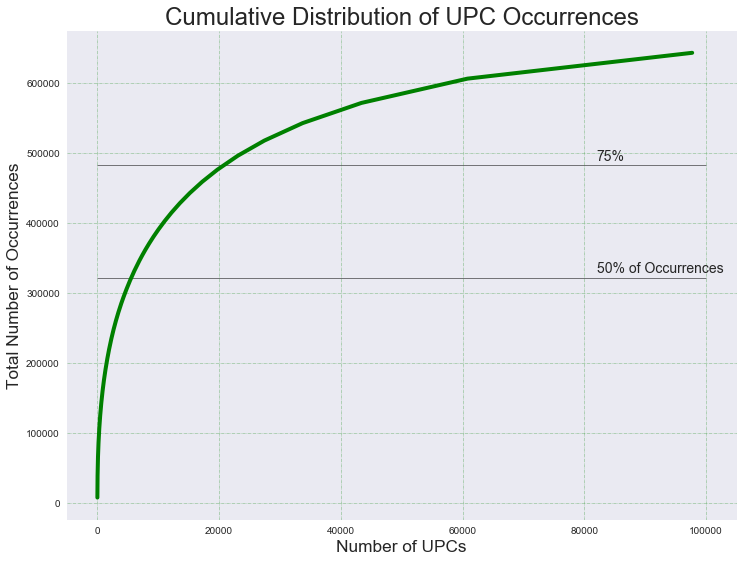

In [595]:
f,ax=plt.subplots(figsize=(12,9))
plt.plot(upc_counts.Counts.cumsum(),linewidth=4,color='g')#
plt.grid(True, 'major','y', ls='-.', lw=.5, c='g', alpha=.5)
plt.grid(True, 'major','x', ls='-.', lw=.5, c='g', alpha=.5)
plt.ylabel('Total Number of Occurrences',fontsize='x-large')
plt.xlabel('Number of UPCs',fontsize='x-large')
plt.hlines(upc_counts.Counts.sum()/2,0,100000,linewidth=0.5)
plt.text(82000,330000,'50% of Occurrences',fontsize=14)
plt.hlines(upc_counts.Counts.sum()*0.75,0,100000,linewidth=0.5)
plt.text(82000,490000,'75%',fontsize=14)
plt.title('Cumulative Distribution of UPC Occurrences',fontsize=24)
plt.show()

In [596]:
upc_occ_sr=upc_counts[['Counts']].groupby((upc_counts.ixnum+10000)//10000*10000).sum()

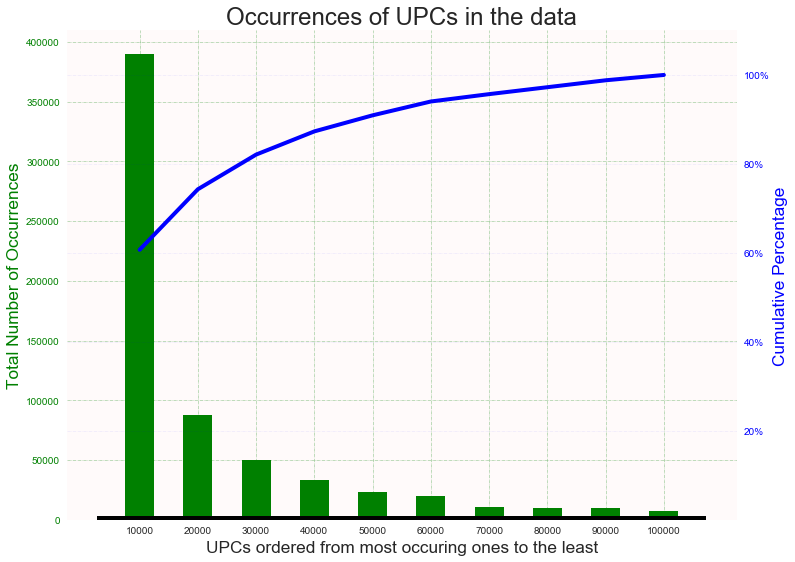

In [597]:
f,ax=plt.subplots(figsize=(12,9))
width=0.5
ind=np.arange(10)
ax.set_facecolor(color='snow')
ax.bar(ind, upc_occ_sr.values,width,color='g')
ax.set_ylabel('Total Number of Occurrences',fontsize='x-large',color='g')
ax.set_xlabel('UPCs ordered from most occuring ones to the least',fontsize='x-large')
ax.grid(True, 'major','y', ls='-.', lw=.5, c='g', alpha=.5)
ax.grid(True, 'major','x', ls='-.', lw=.5, c='g', alpha=.5)
ax.tick_params('y', colors='g')
plt.xticks(ind,t)
plt.title('Occurrences of UPCs in the data',fontsize=24)

ax2=ax.twinx()
ax2.plot(ind,(upc_occ_sr.cumsum()/upc_occ_sr.sum()),color='blue',linewidth=4)
ax2.grid(True, 'major','y', ls='-.', lw=.5, c='blue', alpha=.1)
ax2.grid(True, 'major','x', ls='-.', lw=.5, c='blue', alpha=.1)
ax2.set_ylabel('Cumulative Percentage',fontsize='x-large',color='blue')
ax2.set_yticklabels(['','20%','40%','60%','80%','100%'])
ax2.tick_params('y', colors='blue')
ax2.set_ylim(0,1.1)
plt.hlines(0,ax2.get_xlim()[0],ax2.get_xlim()[1],color='k',linewidth=8)
plt.show()

In [598]:
dept_counts = pd.DataFrame(df_walmart_raw.groupby('DepartmentDescription').size().sort_values(ascending=False))
dept_counts=dept_counts.reset_index().reset_index()
dept_counts.columns=['ixnum','Dept','Count']

In [599]:
dept_counts.head(5)

,ixnum,Dept,Count
0,0,GROCERY DRY GOODS,70402
1,1,DSD GROCERY,68332
2,2,PRODUCE,51115
3,3,DAIRY,43820
4,4,PERSONAL CARE,41969


In [600]:
dept_occ_sr=dept_counts[['Count']].groupby((dept_counts.ixnum+10)//10*10).sum()

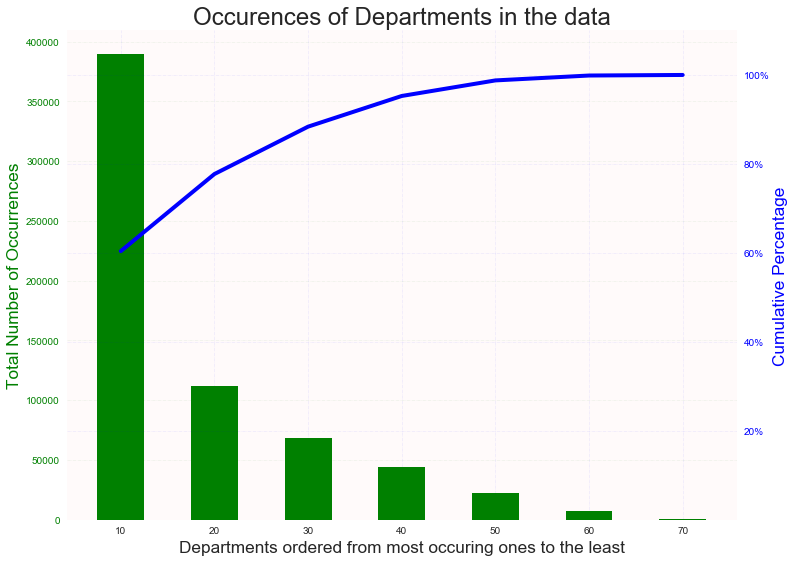

In [601]:
f,ax=plt.subplots(figsize=(12,9))
width=0.5
ind=np.arange(7)
ax.set_facecolor(color='snow')
ax.bar(ind, dept_occ_sr.values,width,color='green')
ax.grid(True, 'major','y', ls='-.', lw=.5, c='green', alpha=.1)
ax.grid(False, 'major','x', ls='-.', lw=.5, c='blue', alpha=.1)
ax.set_ylabel('Total Number of Occurrences',fontsize='x-large',color='g')
ax.tick_params('y', colors='g')
plt.xlabel('Departments ordered from most occuring ones to the least',fontsize='x-large')
plt.xticks(ind,np.arange(10,80,10))
plt.title('Occurences of Departments in the data',fontsize=24)

ax2=ax.twinx()
ax2.plot(ind,(dept_occ_sr.cumsum()/dept_occ_sr.sum()),color='blue',linewidth=4)
ax2.grid(True, 'major','y', ls='-.', lw=.5, c='blue', alpha=.1)
ax2.grid(False, 'major','x', ls='-.', lw=.5, c='blue', alpha=.1)
ax2.set_ylabel('Cumulative Percentage',fontsize='x-large',color='blue')
ax2.set_yticklabels(['','20%','40%','60%','80%','100%'])
ax2.tick_params('y', colors='blue')
ax2.set_ylim(0,1.1)
#plt.hlines(0,ax2.get_xlim()[0],ax2.get_xlim()[1],color='k',linewidth=4)

plt.show()

In [602]:
flno_counts=pd.DataFrame(df_walmart_raw.groupby('FinelineNumber').size().sort_values(ascending=False))
flno_counts=flno_counts.reset_index().reset_index()
flno_counts.columns = ['ixnum','FinelineNumber','TotOcc']

In [603]:
flno_counts['GrpBy500']=((flno_counts.ixnum+500)//500)*500
flno_sum_sr=flno_counts[['GrpBy500','TotOcc']].groupby('GrpBy500').sum()
flno_sum_sr=flno_sum_sr.reset_index()
flno_sum_sr['CumSum']=(flno_sum_sr.TotOcc.cumsum()/flno_sum_sr.TotOcc.sum())*100

In [604]:
flno_sum_sr.head()

,GrpBy500,TotOcc,CumSum
0,500,375919,58.470117
1,1000,109800,75.548314
2,1500,61269,85.078042
3,2000,36976,90.829257
4,2500,23166,94.432477


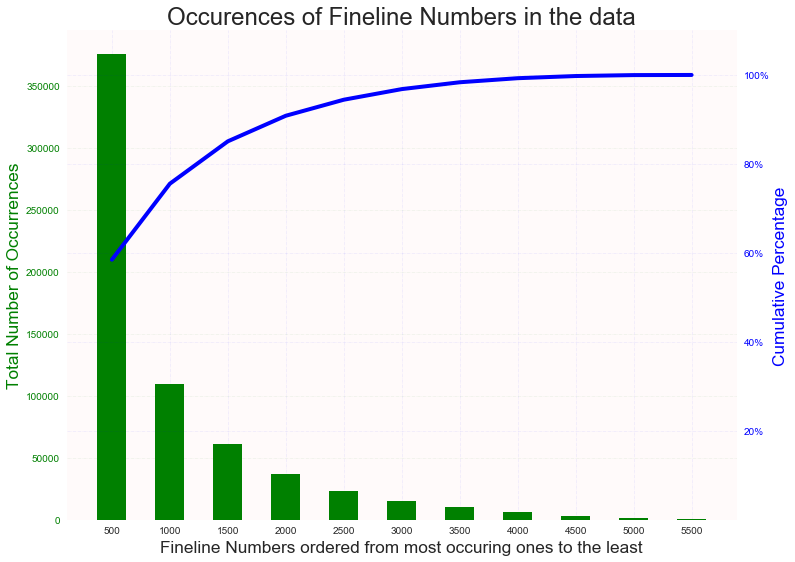

In [605]:
f,ax=plt.subplots(figsize=(12,9))
width=0.5
ax.set_facecolor(color='snow')
ind=np.arange(len(flno_sum_sr))
ax.bar(ind, flno_sum_sr.TotOcc,width,color='green')
ax.set_ylabel('Total Number of Occurrences',fontsize='x-large',color='g')
ax.tick_params('y', colors='g')
ax.grid(True, 'major','y', ls='-.', lw=.5, c='green', alpha=.1)
ax.grid(False, 'major','x', ls='-.', lw=.5, c='blue', alpha=.1)
plt.xlabel('Fineline Numbers ordered from most occuring ones to the least',fontsize='x-large')
plt.xticks(ind,np.arange(500,6000,500))
plt.title('Occurences of Fineline Numbers in the data',fontsize=24)

ax2=ax.twinx()
ax2.plot(ind,flno_sum_sr.CumSum,color='blue',linewidth=4)
ax2.grid(True, 'major','y', ls='-.', lw=.5, c='blue', alpha=.1)
ax2.grid(False, 'major','x', ls='-.', lw=.5, c='blue', alpha=.1)
ax2.set_ylabel('Cumulative Percentage',fontsize='x-large',color='blue')
ax2.set_yticklabels(['','20%','40%','60%','80%','100%'])
ax2.tick_params('y', colors='blue')
ax2.set_ylim(0,110)

plt.show()

## Check if the  trip types are related to day of the Week

In [606]:
trip_types=df_walmart_1st_cleanse.TripType.unique()#.sort(axis=0) #.sort_values()

In [607]:
trip_types.sort(axis=0)

In [608]:
days_of_week=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [609]:
df_days_triptype=pd.DataFrame(df_walmart_1st_cleanse[['Weekday','TripType']].groupby(['TripType','Weekday']).size())

In [610]:
df_days_triptype=df_days_triptype.unstack('Weekday',fill_value=0)

In [611]:
df_days_triptype.head()

0                                                  
Weekday  Friday Monday Saturday Sunday Thursday Tuesday Wednesday
TripType                                                         
3          1408    830     1167    901      760     860       896
4           150    111      164    151      106      96       118
5          1765   1464     1966   1558     1462    1468      1570
6           655    336      855    442      378     351       385
7          3233   3292     3571   4009     2859    2967      3237

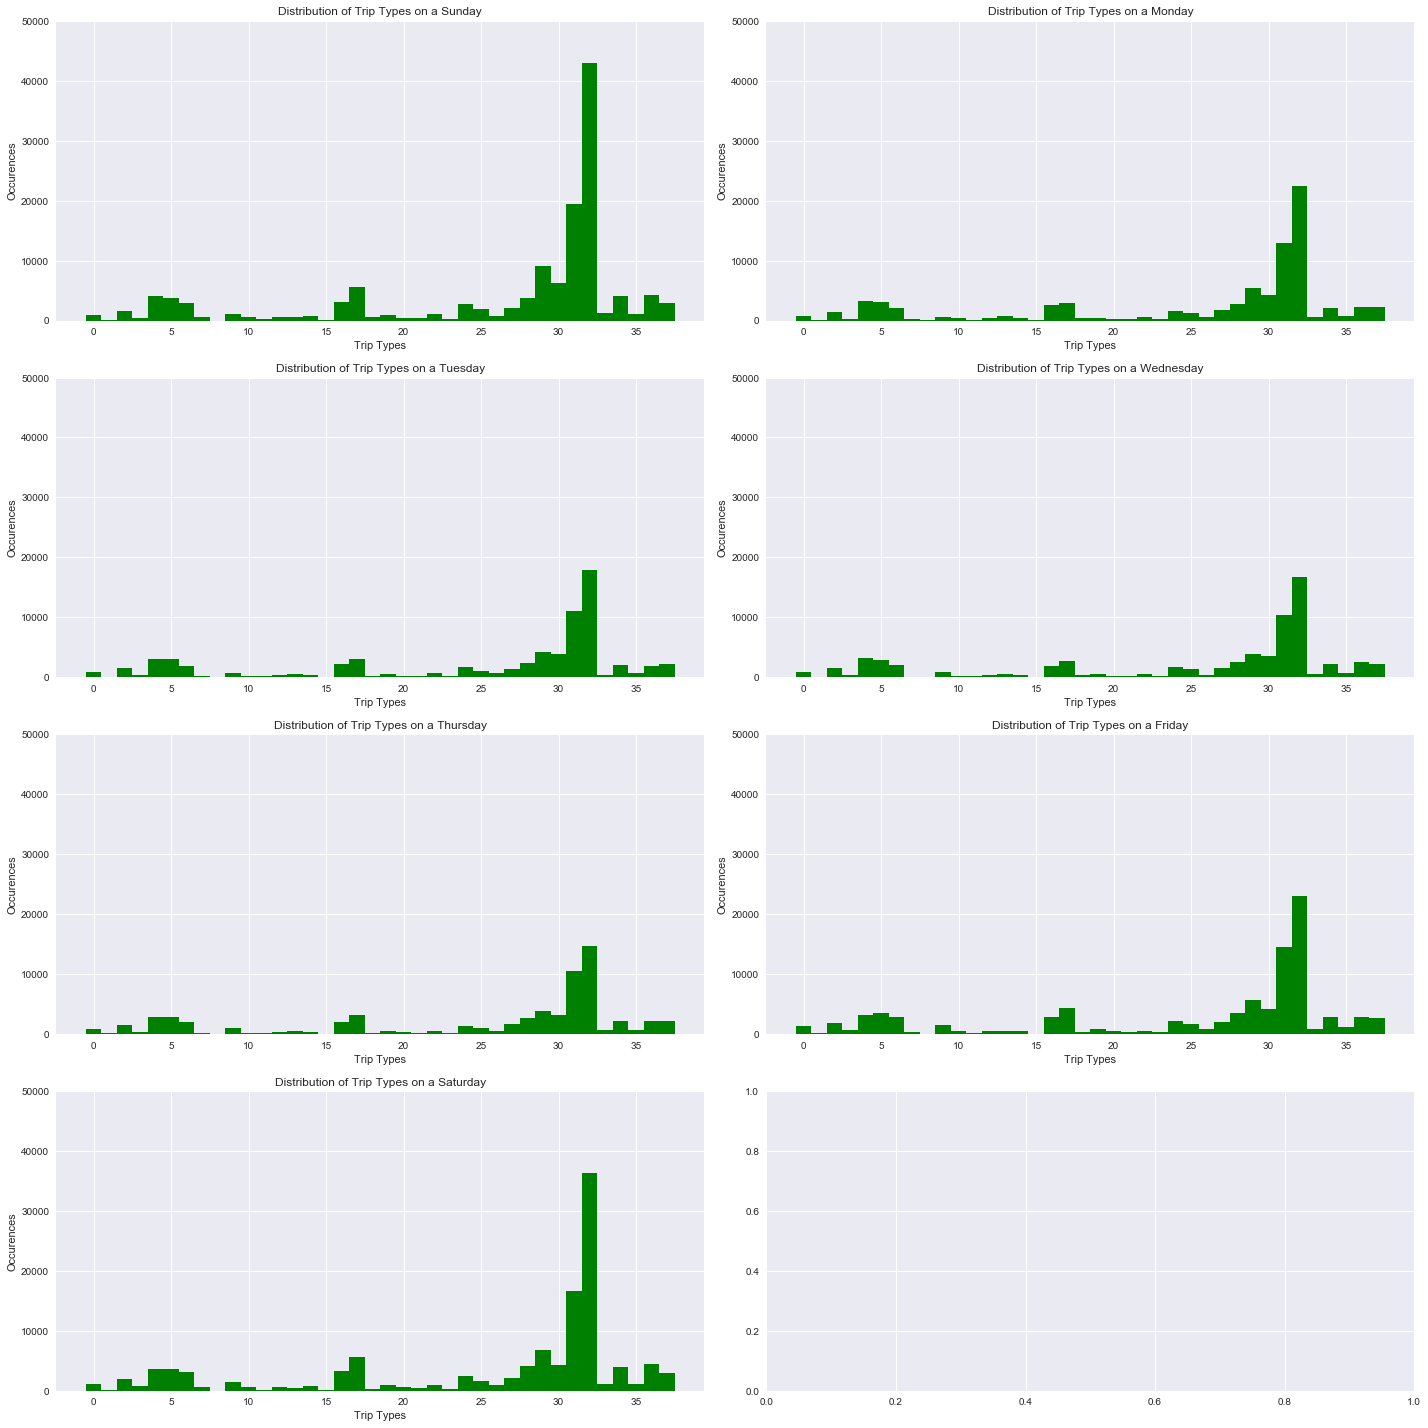

In [612]:
plt.rcParams["figure.figsize"] = (20,20)
fig, axes = plt.subplots(nrows=4, ncols=2)
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = axes.flatten()
ind=np.arange(len(trip_types))
width=1.0
btm=0
tp=50000
clr='green'
ax0.bar(ind, df_days_triptype[[0][0]]['Sunday'].values,width,color=clr)
ax0.set_title('Distribution of Trip Types on a Sunday')
ax0.set_ylim(bottom=btm,top=tp,auto=False)
ax0.set_xlabel('Trip Types')
ax0.set_ylabel('Occurences')

ax1.bar(ind, df_days_triptype[[0][0]]['Monday'].values,width,color=clr)
ax1.set_title('Distribution of Trip Types on a Monday')
ax1.set_ylim(bottom=btm,top=tp,auto=False)
ax1.set_xlabel('Trip Types')
ax1.set_ylabel('Occurences')


ax2.bar(ind, df_days_triptype[[0][0]]['Tuesday'].values,width,color=clr)
ax2.set_title('Distribution of Trip Types on a Tuesday')
ax2.set_ylim(bottom=btm,top=tp,auto=False)
ax2.set_xlabel('Trip Types')
ax2.set_ylabel('Occurences')

ax3.bar(ind, df_days_triptype[[0][0]]['Wednesday'].values,width,color=clr)
ax3.set_title('Distribution of Trip Types on a Wednesday')
ax3.set_ylim(bottom=btm,top=tp,auto=False)
ax3.set_xlabel('Trip Types')
ax3.set_ylabel('Occurences')


ax4.bar(ind, df_days_triptype[[0][0]]['Thursday'].values,width,color=clr)
ax4.set_title('Distribution of Trip Types on a Thursday')
ax4.set_ylim(bottom=btm,top=tp,auto=False)
ax4.set_xlabel('Trip Types')
ax4.set_ylabel('Occurences')

ax5.bar(ind, df_days_triptype[[0][0]]['Friday'].values,width,color=clr)
ax5.set_title('Distribution of Trip Types on a Friday')
ax5.set_ylim(bottom=btm,top=tp,auto=False)
ax5.set_xlabel('Trip Types')
ax5.set_ylabel('Occurences')


ax6.bar(ind, df_days_triptype[[0][0]]['Saturday'].values,width,color=clr)
ax6.set_title('Distribution of Trip Types on a Saturday')
ax6.set_ylim(bottom=btm,top=tp,auto=False)
ax6.set_xlabel('Trip Types')
ax6.set_ylabel('Occurences')

fig.tight_layout()
plt.show()

***

# Data Wrangling

## Analyze the UPCs

`df_walmart_1st_cleanse` is the provided Walmart data without the Null UPCs.

#### About the UPC Number

A UPC number is made up of 12 digits. The manufacturer identification number is the first six digits of the UPC number. The next five digits are the item number. The last digit of the UPC code is called a check digit.

In [615]:
df_walmart_1st_cleanse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642925 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 642925 non-null int64
VisitNumber              642925 non-null int64
Weekday                  642925 non-null object
Upc                      642925 non-null float64
ScanCount                642925 non-null int64
DepartmentDescription    642925 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.2+ MB


In [616]:
#convert UPCs to String
df_walmart_1st_cleanse.Upc = df_walmart_1st_cleanse.Upc.apply(str)
#drop the .0 from the end of the UPC
#upc_counts['str_upc']=upc_counts.str_upc.map(lambda x : x[:-2])
df_walmart_1st_cleanse.Upc=df_walmart_1st_cleanse.Upc.map(lambda x: x[:-2])
#the UPC numbers are of different lengths, store the lenghts in a column
df_walmart_1st_cleanse['UPCLen']=df_walmart_1st_cleanse.Upc.map(lambda x: len(x))

C:\Anac\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Anac\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [617]:
df_walmart_1st_cleanse.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,UPCLen
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0,11
1,30,7,Friday,60538815980,1,SHOES,8931.0,11
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0,10
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565.0,10
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017.0,10


In [618]:
# Distribution of UPC lengths
df_walmart_1st_cleanse.UPCLen.value_counts()

10    433341
11    168418
4      29745
12      8463
9       2166
8        412
5        372
3          7
7          1
Name: UPCLen, dtype: int64

From the above, we see that UPC numbers are of varying length, from just 3 digit to 12 digits. Lets look at a few of these

In [619]:
df_walmart_1st_cleanse[df_walmart_1st_cleanse['UPCLen']==12].head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,UPCLen
48,21,15,Friday,501138607481,1,FABRICS AND CRAFTS,1309.0,12
50,21,15,Friday,501138610338,1,FABRICS AND CRAFTS,1309.0,12
58,42,19,Friday,692656840005,1,FABRICS AND CRAFTS,397.0,12


In [620]:
df_walmart_1st_cleanse[df_walmart_1st_cleanse['UPCLen']==11].head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,UPCLen
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0,11
1,30,7,Friday,60538815980,1,SHOES,8931.0,11
11,26,8,Friday,88679300501,2,PAINT AND ACCESSORIES,3504.0,11


In [621]:
df_walmart_1st_cleanse[df_walmart_1st_cleanse['UPCLen']==10].head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,UPCLen
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0,10
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565.0,10
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017.0,10


In [622]:
df_walmart_1st_cleanse[df_walmart_1st_cleanse['UPCLen']==7].head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,UPCLen
431366,42,128507,Thursday,5080744,1,FABRICS AND CRAFTS,1300.0,7


In [623]:
df_walmart_1st_cleanse[df_walmart_1st_cleanse['UPCLen']==3].head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,UPCLen
429744,40,127954,Thursday,834,1,BAKERY,5016.0,3
429745,40,127954,Thursday,834,2,BAKERY,5016.0,3
448895,39,134005,Friday,834,1,BAKERY,5016.0,3


<div class="alert alert-success">

<p>
From what we see here, though the header of the column says `Upc`, there are multiple variations of the UPC number. To proceed further, we can make some $assumptions$ like the following regarding how the data was created 
<ul>
<li> checkdigit was dropped
<li> leading zeros were dropped
<li> items between 3000 and 4000 are [PLU](https://en.wikipedia.org/wiki/Price_look-up_code) codes
</ul>
<br>
However, since we do not know which of these are true and, there may be other changes that were done to the UPC numbers, we will use the given UPC number as is as features to classify the trip. There are a large number of UPCs, the total number of UPCs are approximately 98,000. <strong>The distribution of UPC numbers is skewed.</strong> 37,080 UPCs occur only once and 20 % of the UPCs occur in approx. 75% of the data.
</p>

<p> Similar behavior is noted in Fineline Number and Departments, i.e. a relatively small % of data is found in a large number of observations. Considering this fact, we will use the <strong>following as the features</strong>
</p>
<ol>
<li> Day of the week
<li> All the Departments
<li> The top 10% of UPC
<li> The top 30% of Fineline Number
</ol>
<p>
With these features, we will have around 12,000 features.
</p>
</div>

## Build a DataFrame where the features of a Visit are in a single observation


In [188]:
df_visits = pd.DataFrame(df_walmart_1st_cleanse.VisitNumber.value_counts().axes[0]) 

In [189]:
df_visits.columns = ['VisitNumber']

In [190]:
df_visits['no_of_items']=df_walmart_1st_cleanse.VisitNumber.value_counts().values
#df_walmart_1st_cleanse.VisitNumber.value_counts().values

In [191]:
df_visits[df_visits.VisitNumber==8784]

,VisitNumber,no_of_items
9092,8784,17


In [192]:
df_visits.head()

,VisitNumber,no_of_items
0,72439,209
1,88011,151
2,9181,113
3,60971,112
4,65792,109


In [193]:
len(df_visits)

95516

In [194]:
dept_list = df_walmart_1st_cleanse.DepartmentDescription.unique()

In [195]:
len(dept_list)

68

In [196]:
dept_list.sort()

In [197]:
dept_list

array(['1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY',
       'BATH AND SHOWER', 'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES',
       'BOYS WEAR', 'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES',
       'CANDY, TOBACCO, COOKIES', 'CELEBRATION', 'COMM BREAD',
       'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS',
       'HOME DECOR', 'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL',
       'INFANT CONSUMABLE HARDLINES', 'JEWELRY AND SUNGLASSES',
       'LADIES SOCKS', 'LADIESWEAR', 'LARGE HOUSEHOLD GOODS',
       'LAWN AND GARDEN', 'LIQUOR,WINE,BEER', 'MEAT - FRESH & FROZEN',
       'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR', 'OFFICE SUPPLIES',
       'OPTICAL - FRAMES', 'OPTICAL 

In [198]:
grouped = df_walmart_1st_cleanse.groupby([df_walmart_1st_cleanse.VisitNumber])

In [199]:
df_walmart_1st_cleanse[df_walmart_1st_cleanse.ScanCount.isnull()].head(5)#check there are no not null Scan Counts

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


In [200]:
'''
this function builds a vector of department descriptions for each visit
*** input ***  
dept_dict - dictionary of department descriptions - all set to zero
dept_series - a Series of all the department description in the order
scan_series - a Series of all the scan count ordered in the same way as department description
*** output ***
numpy array of the scan counts, i.e., total scanned items for a particular department
'''
def buildDeptVector(dept_dict, dept_series, scan_series):
    for i in range(0,len(dept_series)):
        if (dept_series.iloc[i] in dept_dict):
            dept_dict[dept_series.iloc[i]] = dept_dict[dept_series.iloc[i]]+scan_series.iloc[i]
    return list(dept_dict.values())


In [201]:
dept_vect_dict = {}
dept_scan_vect_dict={}

In [202]:
new_df_list=[]
for name,group in grouped:
    dept_scan_vect_dict = dept_scan_vect_dict.fromkeys(dept_list,0)
    ls_dept_scan_vect=[]
    #print('before call:',ls_dept_scan_vect,':')
    #print('dept_vect_dict:',dept_scan_vect_dict,':')
    #print('group.DepartmentDescription:',group.DepartmentDescription,':')
    #print('dept_scan_vect_dict:',dept_scan_vect_dict,':')
    #print('group.ScanCount',group.ScanCount,':')
    ls_dept_scan_vect = buildDeptVector(dept_scan_vect_dict,group.DepartmentDescription,group.ScanCount)
    ls_dept_scan_vect.insert(0,name)
    ls_dept_scan_vect.insert(1,group.TripType.values[0])
    ls_dept_scan_vect.insert(2,group.Weekday.values[0])
    new_df_list.append(ls_dept_scan_vect)
    #print('after call:',ls_dept_scan_vect,':')

In [203]:
dept_list_col_head = list(dept_list)#.insert(0,name)

In [204]:
dept_list_col_head.insert(0,'VisitNumber')
dept_list_col_head.insert(1,'TripType')
dept_list_col_head.insert(2,'Weekday')

In [205]:
df_visit_dept_vector = pd.DataFrame.from_records(new_df_list)

In [206]:
df_visit_dept_vector.columns=dept_list_col_head

In [207]:
df_visit_dept_vector.head(5)

,VisitNumber,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,5,999,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,30,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8,26,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,8,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,10,8,Friday,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
#check to see if we have got 95,516 visits
len(df_visit_dept_vector)

95516

In [209]:
df_visit_dept_vector[df_visit_dept_vector['VisitNumber']==28614]

,VisitNumber,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
14295,28614,24,Tuesday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
# concat the two dataframes df_visits and df_visit_dept_vector
df_visits = pd.concat([df_visits.set_index('VisitNumber'),df_visit_dept_vector.set_index('VisitNumber')],axis=1).sort_index()

In [211]:
df_visits.head(5)

,no_of_items,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,1,999,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2,30,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,22,26,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,8,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
10,3,8,Friday,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
len(df_visits)

95516

In [213]:
df_visits.isnull().sum()

no_of_items                   0
TripType                      0
Weekday                       0
1-HR PHOTO                    0
ACCESSORIES                   0
AUTOMOTIVE                    0
BAKERY                        0
BATH AND SHOWER               0
BEAUTY                        0
BEDDING                       0
BOOKS AND MAGAZINES           0
BOYS WEAR                     0
BRAS & SHAPEWEAR              0
CAMERAS AND SUPPLIES          0
CANDY, TOBACCO, COOKIES       0
CELEBRATION                   0
COMM BREAD                    0
CONCEPT STORES                0
COOK AND DINE                 0
DAIRY                         0
DSD GROCERY                   0
ELECTRONICS                   0
FABRICS AND CRAFTS            0
FINANCIAL SERVICES            0
FROZEN FOODS                  0
FURNITURE                     0
GIRLS WEAR, 4-6X  AND 7-14    0
GROCERY DRY GOODS             0
HARDWARE                      0
HEALTH AND BEAUTY AIDS        0
                             ..
LARGE HO

In [214]:
trip_types = df_visits.TripType.unique()

In [215]:
trip_types.sort()

In [216]:
#df_visits.to_csv('visits.csv')

In [217]:
trip_types

array([  3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44, 999], dtype=int64)

In [218]:
#df_walmart_1st_cleanse.Upc.value_counts().head(5000).sum()
#df_walmart_1st_cleanse[df_walmart_1st_cleanse.Upc.isin(df_walmart_1st_cleanse.Upc.value_counts().head(50))]

In [219]:
df_temp_visits = df_visits.copy(deep=True)

In [220]:
df_temp_visits.head(5)

,no_of_items,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,1,999,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2,30,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,22,26,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,8,Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
10,3,8,Friday,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [221]:
df_temp_visits['TripType'] =df_temp_visits['TripType'].map({3:1,
4:2,
5:3,
6:4,
7:5,
8:6,
9:7,
12:8,
14:9,
15:10,
18:11,
19:12,
20:13,
21:14,
22:15,
23:16,
24:17,
25:18,
26:19,
27:20,
28:21,
29:22,
30:23,
31:24,
32:25,
33:26,
34:27,
35:28,
36:29,
37:30,
38:31,
39:32,
40:33,
41:34,
42:35,
43:36,
44:37,
999:38})

In [222]:
len(df_temp_visits)

95516

****

# Machine Learning  - Applying Models

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
train_df, test_df = train_test_split(df_temp_visits,test_size=0.2)

In [225]:
train_df.head(5)

,no_of_items,TripType,Weekday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,CAMERAS AND SUPPLIES,"CANDY, TOBACCO, COOKIES",CELEBRATION,COMM BREAD,CONCEPT STORES,COOK AND DINE,DAIRY,DSD GROCERY,ELECTRONICS,FABRICS AND CRAFTS,FINANCIAL SERVICES,FROZEN FOODS,FURNITURE,"GIRLS WEAR, 4-6X AND 7-14",GROCERY DRY GOODS,HARDWARE,HEALTH AND BEAUTY AIDS,HOME DECOR,HOME MANAGEMENT,HORTICULTURE AND ACCESS,HOUSEHOLD CHEMICALS/SUPP,HOUSEHOLD PAPER GOODS,IMPULSE MERCHANDISE,INFANT APPAREL,INFANT CONSUMABLE HARDLINES,JEWELRY AND SUNGLASSES,LADIES SOCKS,LADIESWEAR,LARGE HOUSEHOLD GOODS,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEAT - FRESH & FROZEN,MEDIA AND GAMING,MENS WEAR,MENSWEAR,OFFICE SUPPLIES,OPTICAL - FRAMES,OPTICAL - LENSES,OTHER DEPARTMENTS,PAINT AND ACCESSORIES,PERSONAL CARE,PETS AND SUPPLIES,PHARMACY OTC,PHARMACY RX,PLAYERS AND ELECTRONICS,PLUS AND MATERNITY,PRE PACKED DELI,PRODUCE,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
61371,1,38,Sunday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
148216,4,6,Sunday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38451,4,32,Thursday,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60479,1,1,Sunday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70219,8,3,Tuesday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
X=train_df.iloc[:,3:]#use all categories as predictors
Y = train_df.iloc[:,1:2]#trip type to be predicted

In [228]:
X = X.as_matrix().astype(np.float)
Y = Y.as_matrix().astype(np.float)
Y=Y.ravel()

In [229]:
X.shape,Y.shape

((76412, 68), (76412,))

In [230]:
Xtest=test_df.iloc[:,3:]
Ytest=test_df.iloc[:,1:2]

In [231]:
Xtest.shape,Ytest.shape

((19104, 68), (19104, 1))

In [232]:
logreg=LogisticRegression(solver='lbfgs',max_iter=100)

In [233]:
logreg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
Ypredict=logreg.predict(Xtest)

In [235]:
'''
Calculate the accuracy of the model prediction
Accuracy calculated as % of accurate prediction of the test set. Given by,
(actual Trip Type - predicted Trip Type) - total predictions
'''
#sag;C=default; accuracy = 0.61243718592964824
#sag;C=1e5; accuracy = 0.61254187604690113
#sag;C=1e7; accuracy = 0.61259422110552764
#liblinear;accuracy = 0.60945351758793975
#newton-cg;accuray = 0.60924413735343386
#lbfgs;accuracy = 0.60940117252931325

((np.array(pd.Series(Ytest['TripType']).values)-Ypredict)==0).sum() / len(Ypredict)



0.60966289782244554

In [236]:
results_df=pd.DataFrame(Ytest)

In [237]:
results_df['VisitNumber']=test_df.index

In [238]:
results_df['PredTripType']=Ypredict

In [239]:
results_df=results_df.reset_index(drop=True)

In [240]:
%matplotlib inline 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# special matplotlib argument for improved plots
from matplotlib import rcParams

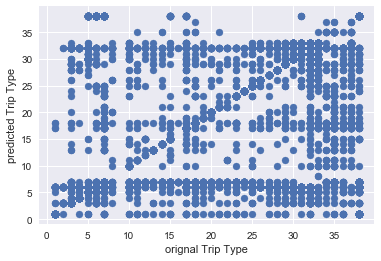

In [241]:
plt.scatter(results_df['TripType'],results_df['PredTripType'])
plt.xlabel("orignal Trip Type")
plt.ylabel("predicted Trip Type")